# Bike Sharing Business Case Study

## Problem Statement

A US bike-sharing provider BoomBikes has observed dip in revenue due to Covid-19. So, the company wants to understand the demand for shared bikes among the people after ongoing quarantine situation ends across the nation due to Covid-19 so that they can regain the market. So, they contacted a consulting company to understand the factors on which the demand for these shared bikes depends.  

Specifically the company wants to know so that they apply the same knowledge in their business strategy: <br>
-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands

Our Goal:<br>

Our goal is to create a linear regression model to understand which independent variables/attributes (predictor) are mostly impacting outcome variable "cnt". 

# Steps 
1. Reading and cleaning the Data
2. Visualising the data - univariate, bivariate analysis
3. Data preparation for Modeling 
4. Building a linear model
5. Resudual analysis of the training data
6. Making prediction using final model
7. Model evaluation
8. Summary

### Step 1 : Reading and cleaning data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import required common libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data set
bike_df = pd.read_csv(r"day.csv", sep=",")
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Check no. of rows and columns 
bike_df.shape

(730, 16)

In [101]:
#Check data type  of columns. Also check whether any columns contains null data or not
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The above data is showing that there is no empty columns 

In [5]:
## Round off floats to decimal points 

bike_df["temp"]      = bike_df["temp"].round(3)
bike_df["atemp"]     = bike_df["atemp"].round(3)
bike_df["hum"]       = bike_df["hum"].round(3)
bike_df["windspeed"] = bike_df["windspeed"].round(3)

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305,11.464,43.696,12.522,82,1518,1600


In [6]:
## Coverting integer to categorical variables for the columns "season", "weathersit", "mnth" and "weekday"

bike_df.loc[bike_df['weathersit'] == 1, 'weathersit'] = 'Clear Weather'
bike_df.loc[bike_df['weathersit'] == 2, 'weathersit'] = 'Mist Weather'
bike_df.loc[bike_df['weathersit'] == 3, 'weathersit'] = 'Light Rain'
bike_df.loc[bike_df['weathersit'] == 4, 'weathersit'] = 'Heavy Rain'

bike_df.loc[bike_df['season'] == 1, 'season'] = 'spring'
bike_df.loc[bike_df['season'] == 2, 'season'] = 'summer'
bike_df.loc[bike_df['season'] == 3, 'season'] = 'fall'
bike_df.loc[bike_df['season'] == 4, 'season'] = 'winter'

bike_df.loc[bike_df['mnth'] == 1, 'mnth'] = 'Jan'
bike_df.loc[bike_df['mnth'] == 2, 'mnth'] = 'Feb'
bike_df.loc[bike_df['mnth'] == 3, 'mnth'] = 'Mar'
bike_df.loc[bike_df['mnth'] == 4, 'mnth'] = 'Apr'
bike_df.loc[bike_df['mnth'] == 5, 'mnth'] = 'May'
bike_df.loc[bike_df['mnth'] == 6, 'mnth'] = 'Jun'
bike_df.loc[bike_df['mnth'] == 7, 'mnth'] = 'July'
bike_df.loc[bike_df['mnth'] == 8, 'mnth'] = 'Aug'
bike_df.loc[bike_df['mnth'] == 9, 'mnth'] = 'Sep'
bike_df.loc[bike_df['mnth'] == 10, 'mnth'] = 'Oct'
bike_df.loc[bike_df['mnth'] == 11, 'mnth'] = 'Nov'
bike_df.loc[bike_df['mnth'] == 12, 'mnth'] = 'Dec'

bike_df.loc[bike_df['weekday'] == 0, 'weekday'] = 'Sun'
bike_df.loc[bike_df['weekday'] == 1, 'weekday'] = 'Mon'
bike_df.loc[bike_df['weekday'] == 2, 'weekday'] = 'Tue'
bike_df.loc[bike_df['weekday'] == 3, 'weekday'] = 'Wed'
bike_df.loc[bike_df['weekday'] == 4, 'weekday'] = 'Thur'
bike_df.loc[bike_df['weekday'] == 5, 'weekday'] = 'Fri'
bike_df.loc[bike_df['weekday'] == 6, 'weekday'] = 'Sat'

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist Weather,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist Weather,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear Weather,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear Weather,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear Weather,9.305,11.464,43.696,12.522,82,1518,1600


In [7]:
# check columns having same value or not
col_having_same_value = []
for i in bike_df.columns:
    if bike_df[i].nunique() == 1:
        col_having_same_value.append(i)
print(col_having_same_value)
print("Shape of the data frame before the process:",bike_df.shape)
bike_df.drop(col_having_same_value,axis=1,inplace=True)
print("Shape of the data frame after the process:",bike_df.shape)

[]
Shape of the data frame before the process: (730, 16)
Shape of the data frame after the process: (730, 16)


There is no columns having same value based on above data

In [8]:
# Remove unnecessary columns as those are not required for the analysis
bike_df = bike_df.drop(["casual","registered","instant","dteday"],axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist Weather,14.111,18.181,80.583,10.750,985
1,spring,0,Jan,0,Sun,0,Mist Weather,14.903,17.687,69.609,16.652,801
2,spring,0,Jan,0,Mon,1,Clear Weather,8.051,9.470,43.727,16.637,1349
3,spring,0,Jan,0,Tue,1,Clear Weather,8.200,10.606,59.044,10.740,1562
4,spring,0,Jan,0,Wed,1,Clear Weather,9.305,11.464,43.696,12.522,1600


In [9]:
bike_df.shape

(730, 12)

### Step 2: Visualizing the data 

Lets visualize the data and understand the dataset. 


####  Univariate & Bivariate Analysis 

Lets plot some countplot 

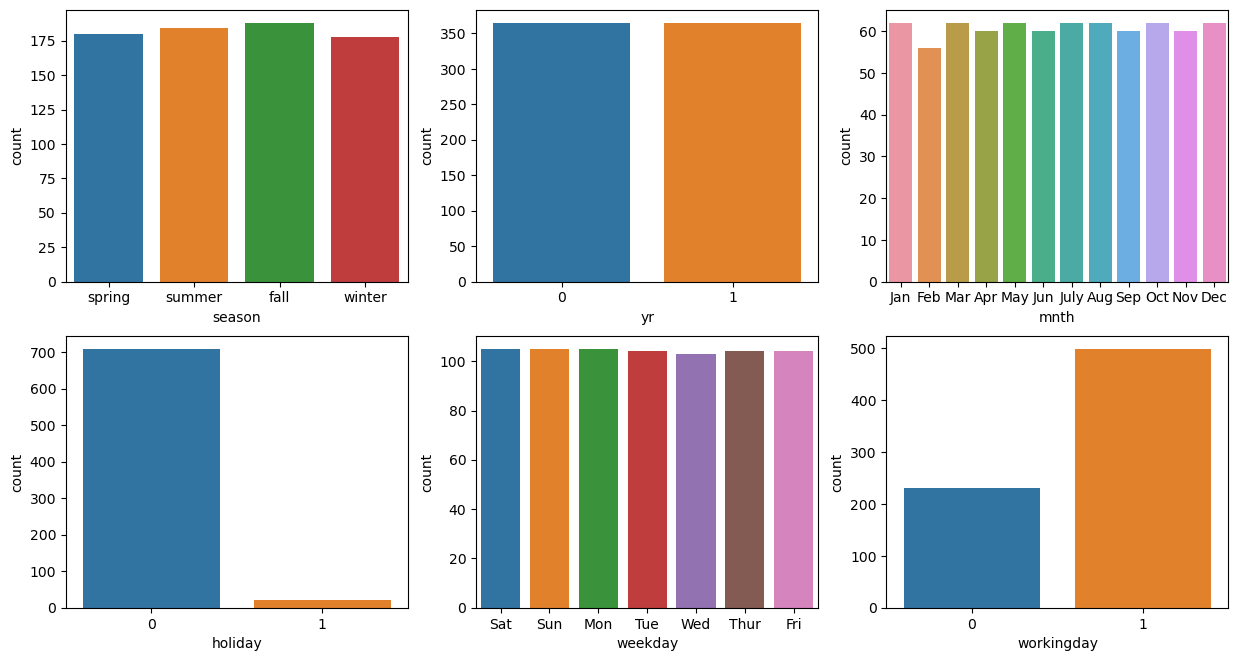

In [10]:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.countplot(x=bike_df["season"])
plt.subplot(3,3,2)
sns.countplot(x=bike_df["yr"])
plt.subplot(3,3,3)
sns.countplot(x=bike_df["mnth"])
plt.subplot(3,3,4)
sns.countplot(x=bike_df["holiday"])
plt.subplot(3,3,5)
sns.countplot(x=bike_df["weekday"])
plt.subplot(3,3,6)
sns.countplot(x=bike_df["workingday"])
plt.show()

Lets plot box plot 

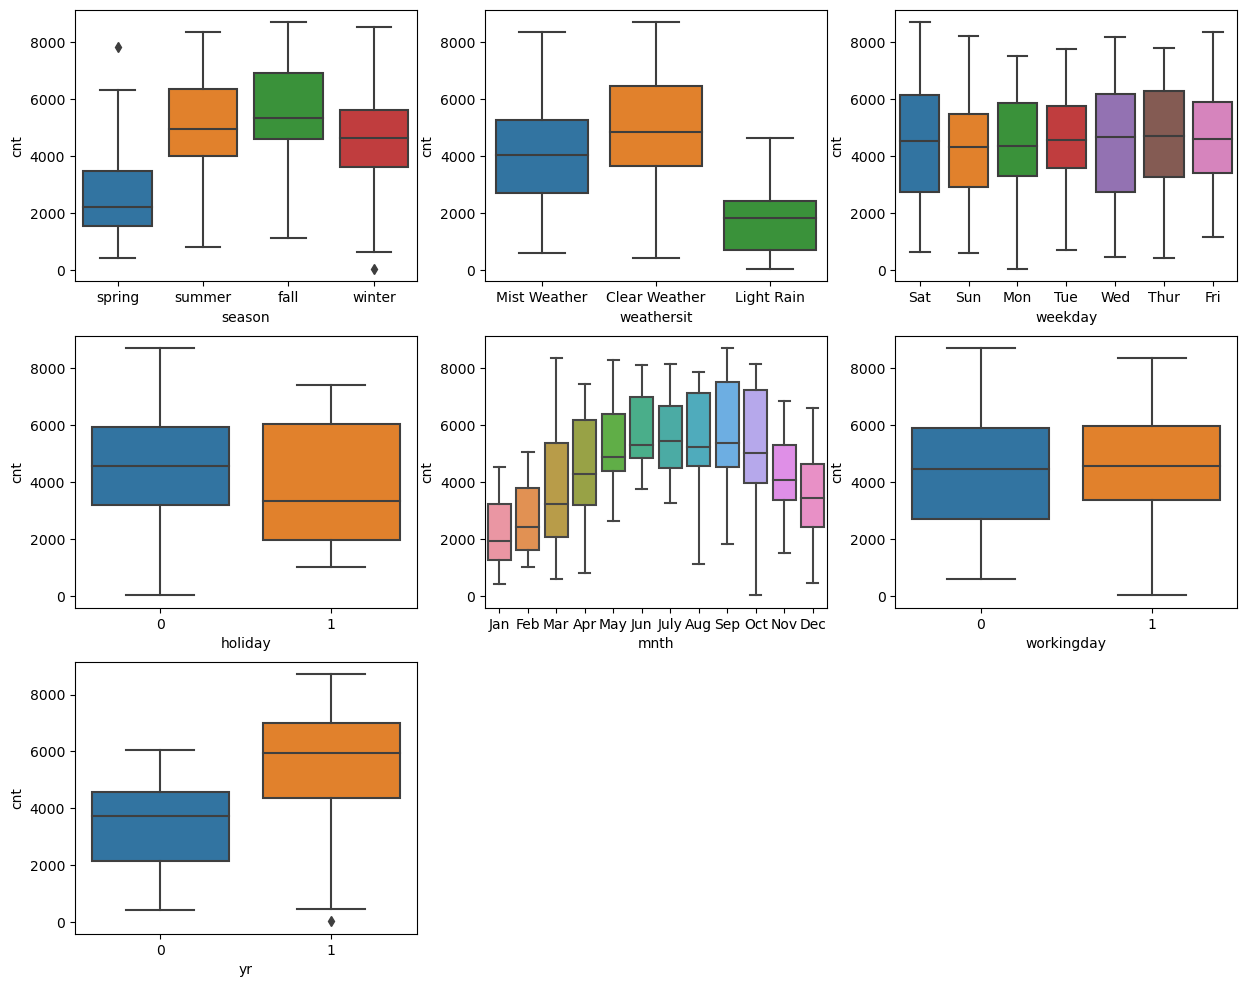

In [11]:
# Visualizing the categorical variables 
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.boxplot(x="season", y="cnt", data=bike_df)
plt.subplot(3,3,2)
sns.boxplot(x="weathersit", y="cnt", data=bike_df)
plt.subplot(3,3,3)
sns.boxplot(x="weekday", y="cnt", data=bike_df)
plt.subplot(3,3,4)
sns.boxplot(x="holiday", y="cnt", data=bike_df)
plt.subplot(3,3,5)
sns.boxplot(x="mnth", y="cnt", data=bike_df)
plt.subplot(3,3,6)
sns.boxplot(x="workingday", y="cnt", data=bike_df)
plt.subplot(3,3,7)
sns.boxplot(x="yr", y="cnt", data=bike_df)
plt.show()

The observations from the blox plots of categorical variables 
-  	The median correspond to the count of total rental bikes is the highest during fall season and lowest during spring season
-  	The median correspond to the count of total rental bikes is the highest during clear weather and lowest during light rain
-  	The median correspond to the count of total rental bikes are higher (and almost same) on   Wednesday, Thursday and Saturday. It is slightly lower on other days. 
-  	The median correspond to the count of total rental bikes is the highest when there is no holiday
-  	The median correspond to the count of total rental bikes is the highest in 2019
-  	The median corresponding to the count of total rental bikes is showing highest in July and September. It is the lowest in Jan. 
-  	There is no significant difference in the median between working day and non-working day



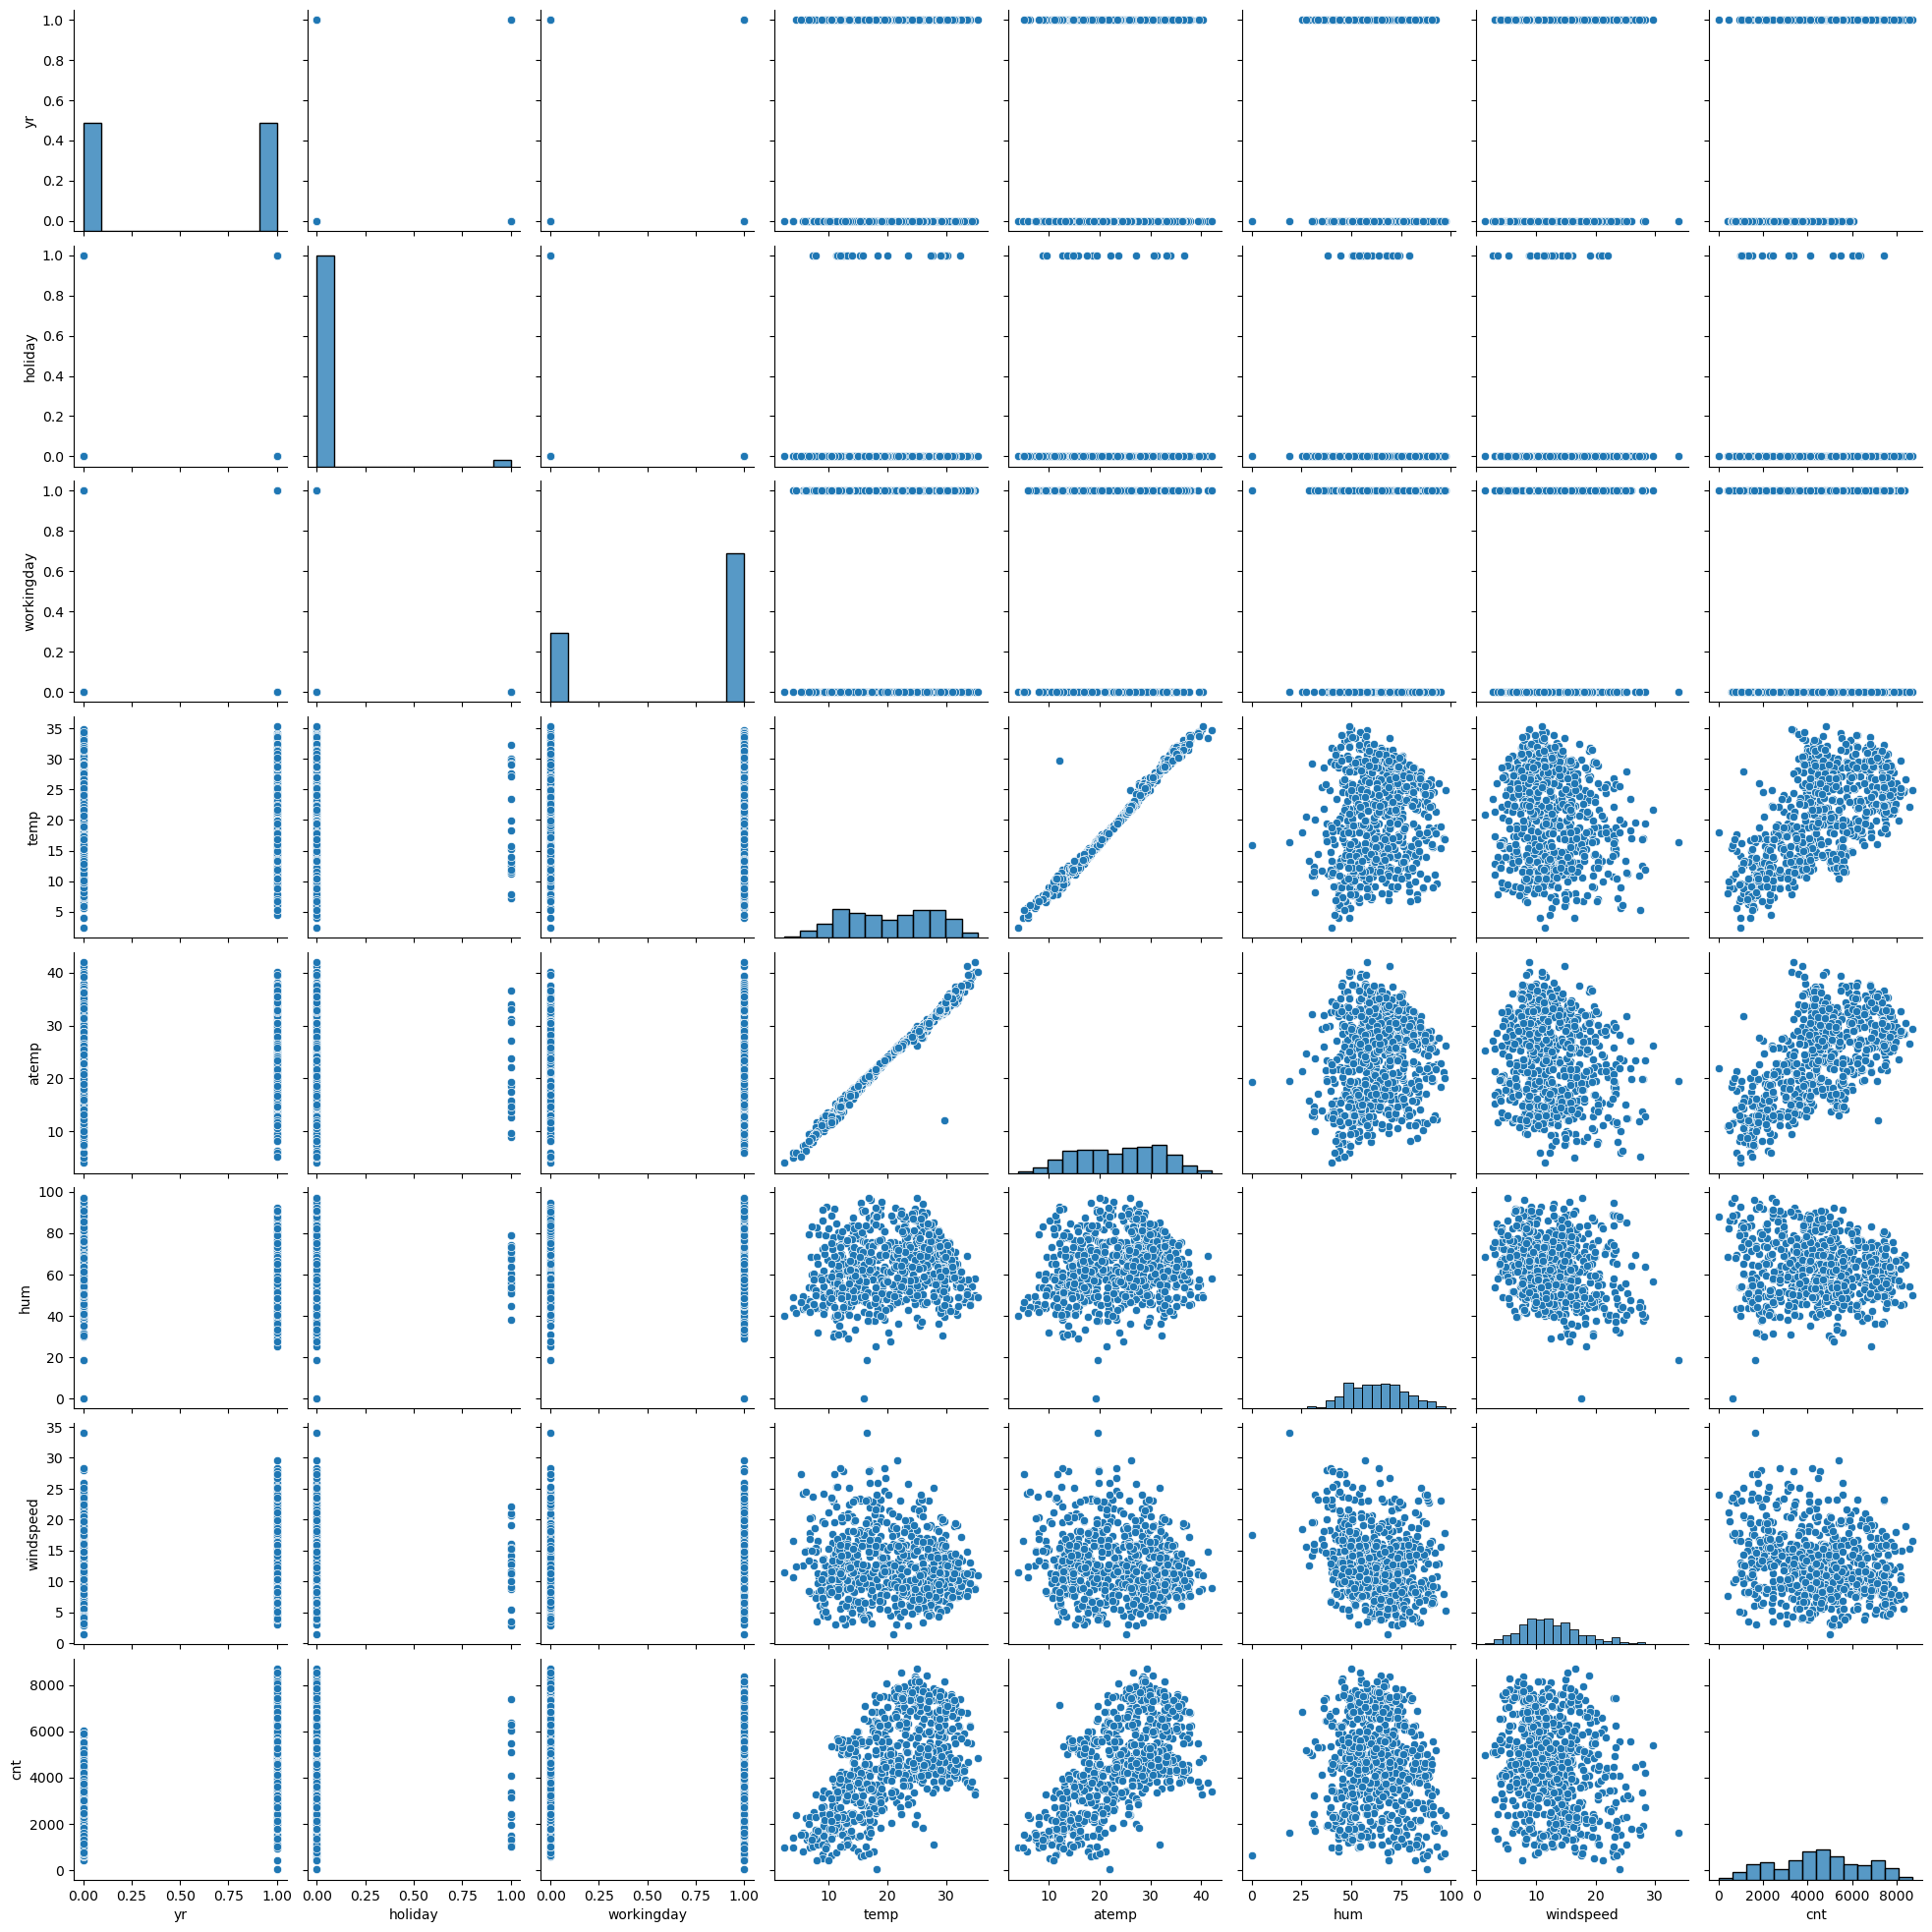

In [12]:
# Let's plot pair plot
sns.pairplot(bike_df)
plt.show()

The above plot is showing that "cnt" variable has some sort of linear relationship with "temp", "atemp". Let's plot the relationship for only these variables

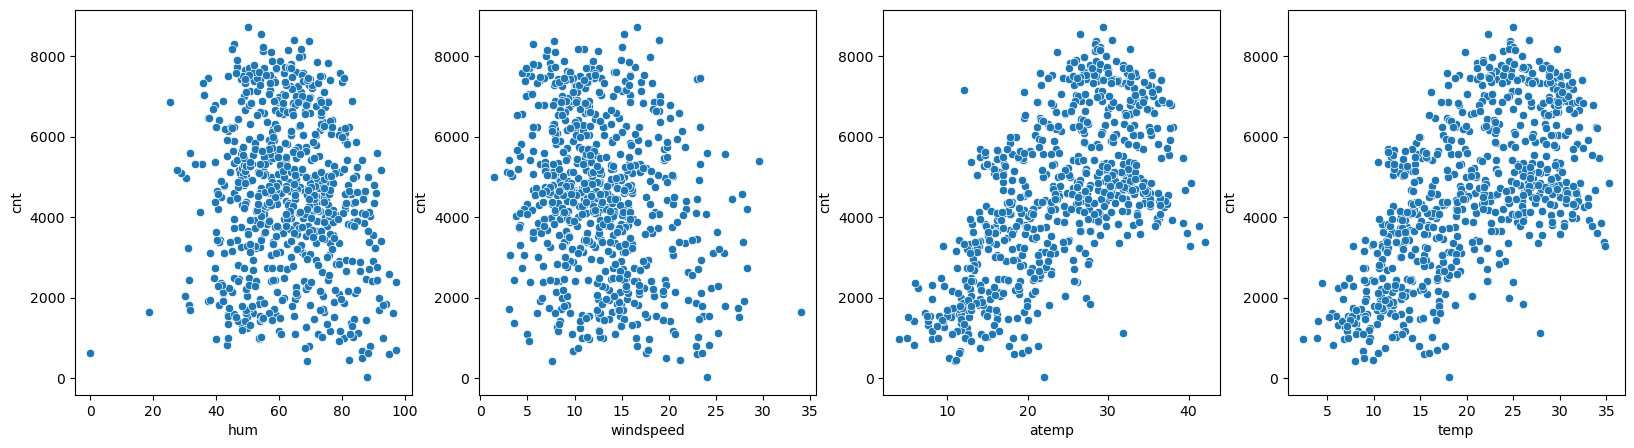

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.scatterplot(x="hum", y="cnt", data=bike_df)
plt.subplot(1,4,2)
sns.scatterplot(x="windspeed", y="cnt", data=bike_df)
plt.subplot(1,4,3)
sns.scatterplot(x="atemp", y="cnt", data=bike_df)
plt.subplot(1,4,4)
sns.scatterplot(x="temp", y="cnt", data=bike_df)
plt.show()

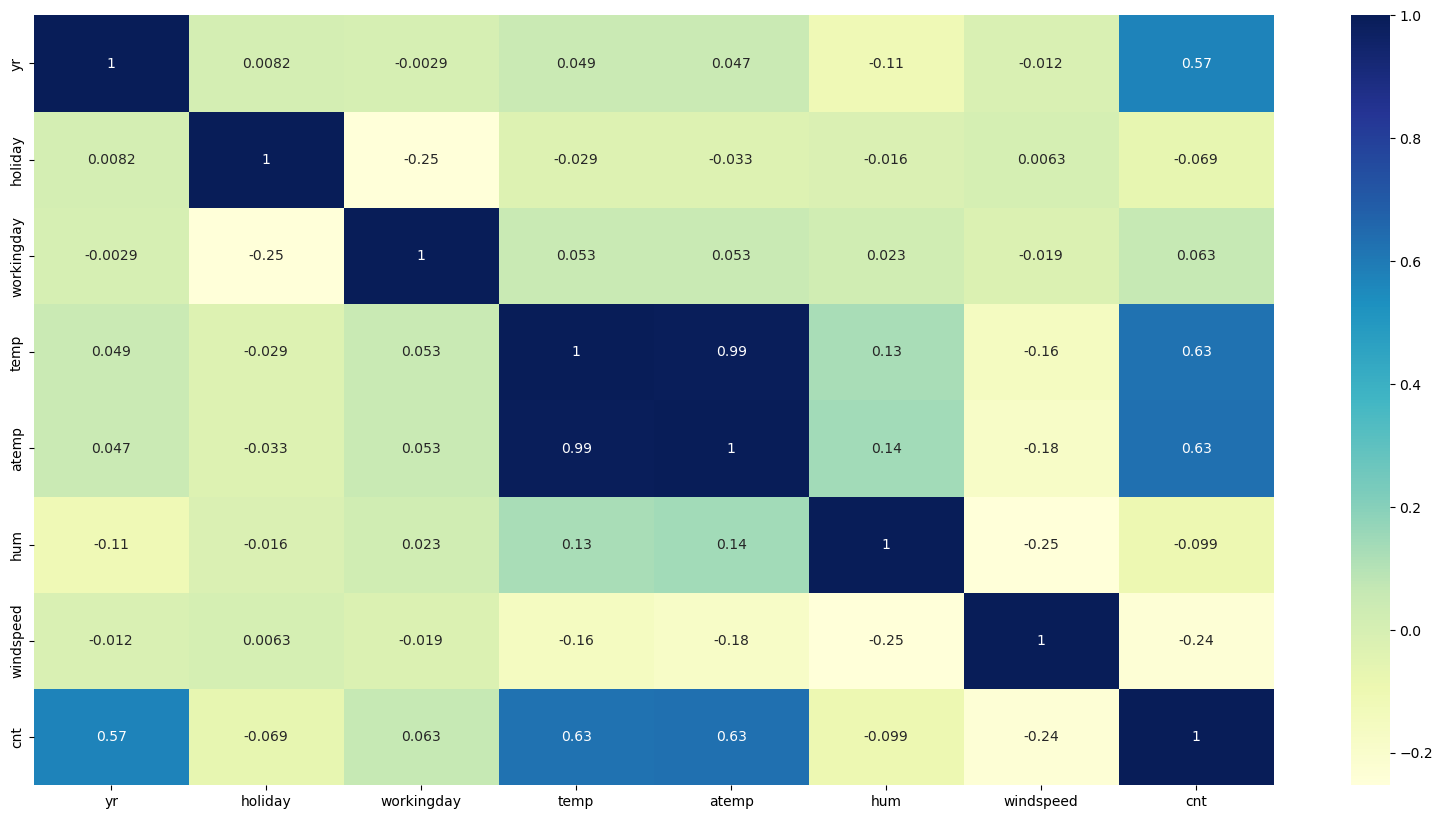

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

The above corelation chart is showing high corelation of cnt with temp and atemp followed by yr. 

### Step 3: Data Preparation for Modeling 
     a. Converting categorical variables to dummy variables 
     b. Split data set into train and test set
     c. Rescaling of variables

#### a.  Converting categorical variables to dummy variables 

In [15]:
#creating dummy variables for "season","weathersit", "mnth", "weekday"
season = pd.get_dummies(bike_df["season"])
weathersit = pd.get_dummies(bike_df["weathersit"])
mnth = pd.get_dummies(bike_df["mnth"])
weekday = pd.get_dummies(bike_df["weekday"])
print(season)
print(weathersit)
print(mnth)
print(weekday)

     fall  spring  summer  winter
0       0       1       0       0
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       1       0       0
..    ...     ...     ...     ...
725     0       1       0       0
726     0       1       0       0
727     0       1       0       0
728     0       1       0       0
729     0       1       0       0

[730 rows x 4 columns]
     Clear Weather  Light Rain  Mist Weather
0                0           0             1
1                0           0             1
2                1           0             0
3                1           0             0
4                1           0             0
..             ...         ...           ...
725              0           0             1
726              0           0             1
727              0           0             1
728              1           0             0
729              0           0             1

[730 rows x 3 columns]
    

For categorical variable "season" =>
We do not need 4 dummy variables. Rather we can use 3 dummy variables to represent 4 categorical variables:
-  fall   : 000
-  spring : 100
-  summer : 010
-  winter : 001

So, fall can be dropped through drop_first during dummy vatriable creation 

For categorical variable "weathersit" =>
We do not need 3 dummy variables. Rather we can use 2 dummy variables to represent 3 categorical variables
-  Clear weather : 00
-  Light rain : 10
-  Mist weather : 01
So, "Clear weather" can be dropped through drop_first during dummy variable creation

For categorical variable "mnth" =>
We do not need 12 dummy variables. Rather we can use 11 dummy variables to represent 12 categorical variables, In this case "Apr" will be removed through "drop_frist" during dummy variable creation


For categorical variable "weekday" =>
We do not need 7 dummy variables. Rather we can use 6 dummy variables to represent 7 categorical variables, In this case "Fri" will be removed through "drop_frist" during dummy variable creation



In [16]:
# Droping redundant first dummy variable column

season = pd.get_dummies(bike_df["season"],drop_first=True)
weathersit = pd.get_dummies(bike_df["weathersit"],drop_first=True)
mnth = pd.get_dummies(bike_df["mnth"],drop_first=True)
weekday = pd.get_dummies(bike_df["weekday"],drop_first=True)

print(season.head())
print(weathersit.head())
print(mnth.head())
print(weekday.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   Light Rain  Mist Weather
0           0             1
1           0             1
2           0             0
3           0             0
4           0             0
   Aug  Dec  Feb  Jan  July  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1     0    0    0    0    0    0    0
1    0    0    0    1     0    0    0    0    0    0    0
2    0    0    0    1     0    0    0    0    0    0    0
3    0    0    0    1     0    0    0    0    0    0    0
4    0    0    0    1     0    0    0    0    0    0    0
   Mon  Sat  Sun  Thur  Tue  Wed
0    0    1    0     0    0    0
1    0    0    1     0    0    0
2    1    0    0     0    0    0
3    0    0    0     0    1    0
4    0    0    0     0    0    1


In [17]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist Weather,14.111,18.181,80.583,10.750,985
1,spring,0,Jan,0,Sun,0,Mist Weather,14.903,17.687,69.609,16.652,801
2,spring,0,Jan,0,Mon,1,Clear Weather,8.051,9.470,43.727,16.637,1349
3,spring,0,Jan,0,Tue,1,Clear Weather,8.200,10.606,59.044,10.740,1562
4,spring,0,Jan,0,Wed,1,Clear Weather,9.305,11.464,43.696,12.522,1600


In [18]:
#concat new dummy variable list with original dataframe

bike_df = pd.concat([bike_df,season],axis=1)
bike_df = pd.concat([bike_df,weathersit],axis=1)
bike_df = pd.concat([bike_df,mnth],axis=1)
bike_df = pd.concat([bike_df,weekday],axis=1)

bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,spring,0,Jan,0,Sat,0,Mist Weather,14.111,18.181,80.583,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist Weather,14.903,17.687,69.609,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear Weather,8.051,9.470,43.727,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear Weather,8.200,10.606,59.044,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear Weather,9.305,11.464,43.696,...,0,0,0,0,0,0,0,0,0,1


In [19]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Light Rain', 'Mist Weather', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

Lets drop "season", "mnth", "weekday", "weathersit" as dummy variables have already been created based on these columns 

In [20]:
bike_df = bike_df.drop(["season","mnth","weekday","weathersit"],axis=1)

In [21]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   spring        730 non-null    uint8  
 9   summer        730 non-null    uint8  
 10  winter        730 non-null    uint8  
 11  Light Rain    730 non-null    uint8  
 12  Mist Weather  730 non-null    uint8  
 13  Aug           730 non-null    uint8  
 14  Dec           730 non-null    uint8  
 15  Feb           730 non-null    uint8  
 16  Jan           730 non-null    uint8  
 17  July          730 non-null    uint8  
 18  Jun           730 non-null    

#### b. Split data set into train and test set 

First step is to split the dataset into train and test set

In [22]:
#Load train_test_split from sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
print("Training set size: ", bike_df_train.shape)
print("Test     set size: ", bike_df_test.shape)


Training set size:  (510, 30)
Test     set size:  (219, 30)


In [24]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102422,23.493916,63.112918,12.831314,4486.382353,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,7.431154,8.090013,14.156635,5.291833,1952.158739,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,2.424000,3.953000,0.000000,2.834000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606750,16.603250,52.270750,9.042000,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209500,24.020500,63.437500,12.083500,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.616000,30.178000,73.250250,15.750750,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328000,42.045000,97.042000,34.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
bike_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   spring        510 non-null    uint8  
 9   summer        510 non-null    uint8  
 10  winter        510 non-null    uint8  
 11  Light Rain    510 non-null    uint8  
 12  Mist Weather  510 non-null    uint8  
 13  Aug           510 non-null    uint8  
 14  Dec           510 non-null    uint8  
 15  Feb           510 non-null    uint8  
 16  Jan           510 non-null    uint8  
 17  July          510 non-null    uint8  
 18  Jun           510 non-null   

#### c. Rescaling features

Lets rescale the variables so that they have a comparable scale. If the varibles are not in comparable scale, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This will create issue during model evaluation.<br>

There are two common ways of rescaling:

-  Min-Max scaling ( 0 to 1)
-  Standardisation (mean-0, sigma-1)

We will use MinMax scaling as it takes care of outliers 

In [26]:
## Min-Max scaling

# import MinMaxScalar 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# create a list of numeric variables 
num_vars = ["temp","atemp","hum","windspeed","cnt"]

#Fit the data
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537273,0.512993,0.650367,0.320776,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225843,0.212381,0.145882,0.169795,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339860,0.332097,0.538640,0.199191,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540527,0.526817,0.653712,0.296782,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735230,0.688465,0.754830,0.414450,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


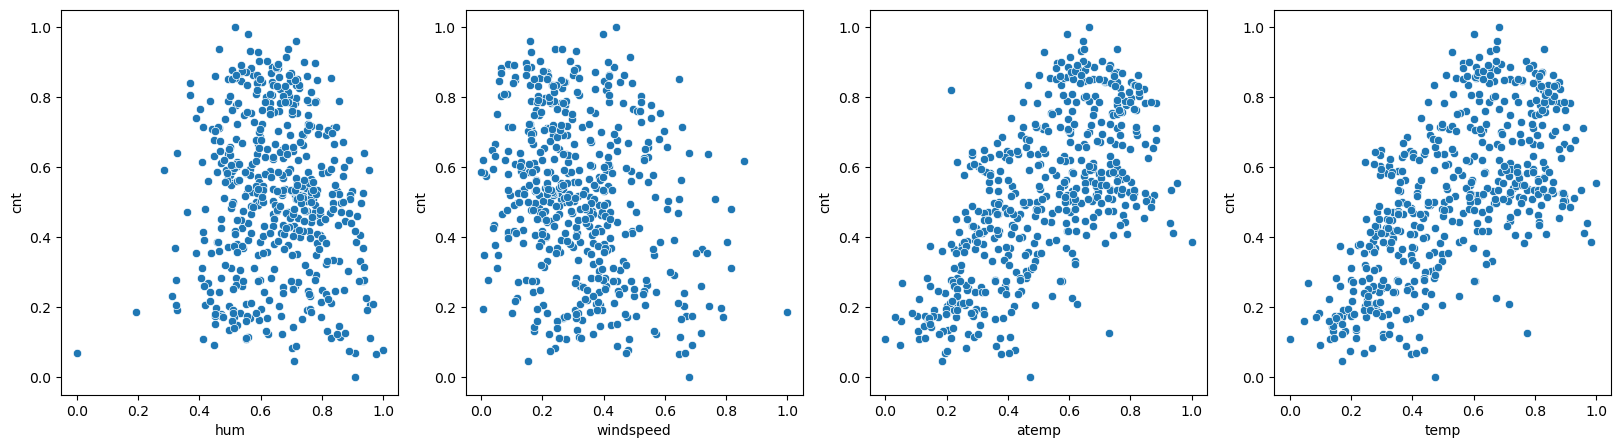

In [27]:
# Lets plot and see whether scaling is done or not 

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.scatterplot(x="hum", y="cnt", data=bike_df_train)
plt.subplot(1,4,2)
sns.scatterplot(x="windspeed", y="cnt", data=bike_df_train)
plt.subplot(1,4,3)
sns.scatterplot(x="atemp", y="cnt", data=bike_df_train)
plt.subplot(1,4,4)
sns.scatterplot(x="temp", y="cnt", data=bike_df_train)
plt.show()

The above plot is shwoing that scaling has been done as both x and y are within 0 and 1 

### Step 4: Building a linear model


In [28]:
# Lets split "cnt" in y (output) and the rest of the variables in X (predictor)
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train


#### Biuld the model using "LinearRegression" function from SciKit Learn for its compatibility with RFE (Recursive Feature Elimination)

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,step=10)             
rfe = rfe.fit(X_train, y_train)

In [31]:
#Check rank of each variable provided by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist Weather', True, 1),
 ('Aug', False, 3),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('July', True, 1),
 ('Jun', False, 3),
 ('Mar', False, 3),
 ('May', False, 3),
 ('Nov', False, 2),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thur', False, 3),
 ('Tue', False, 3),
 ('Wed', False, 3)]

In [32]:
# Colelct all vartiables which are required for analysis listed by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Light Rain', 'Mist Weather', 'July', 'Sep', 'Sat', 'Sun'],
      dtype='object')

In [33]:
# Colelct all vartiables which are not required for analysis listed by RFE

X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [34]:
# build the model using statsmodel
X_train_rfe = X_train[col]

import statsmodels.api as sm
X_train_lr_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lr_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.82e-190
Time:                        19:15:44   Log-Likelihood:                 511.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2418      0.025      9.590      0.000       0.192       0.291
yr               0.2307      0.008     28.473      0.000       0.215       0.247
holiday         -0.0088      0.021     -0.411      0.681      -0.051       0.033
workingday       0.0945      0.009     10.206      0.000       0.076       0.113
temp             0.4788      0.031     15.671      0.000       0.419       0.539
hum             -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed       -0.1686      0.025     -6.622      0.000      -0.219      -0.119
spring          -0.1067      0.015     -7.194      0.000      -0.136      -0.078
winter           0.0579      0.012      4.712      0.000       0.034       0.082
Light Rain      -0.2513      0.026     -9.541      0.000      -0.303      -0.200
Mist Weather    -0.0594      0.011     -5.648      0.000      -0.080      -0.039
July            -0.0779      0.017     -4.560      0.000      -0.111      -0.044
Sep              0.0595      0.015      3.853      0.000       0.029       0.090
Sat              0.1043      0.011      9.167      0.000       0.082       0.127
Sun              0.0517      0.012      4.317      0.000       0.028       0.075
==============================================================================
Omnibus:                       61.394   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.929
Skew:                          -0.607   Prob(JB):                     3.08e-35
Kurtosis:                       5.450   Cond. No.                     1.16e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can see from above stats data that <br>
-  adjusted R2 is 83.9% 
-  p value is not significant for the variables "holiday" (The cut off of p value being considerd is 0.05. if p value of variable > 0.05, the variable is not significant) <br>
We should drop "holiday" but we should check VIF (Variance Inflation Factor) also  to check multicollinearity before dropping the variable <br>

Formula for calculating VIF:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [35]:
# Create a new function to calculate VIF so that it can be reused multiple times 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(X) :
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)
    

In [36]:
#Calculating VIF using new function
calculate_vif(X_train_lr_1)

,Features,VIF
2,holiday,inf
3,workingday,inf
13,Sat,inf
14,Sun,inf
4,temp,2.99
7,spring,2.55
5,hum,1.89
8,winter,1.78
10,Mist Weather,1.57
11,July,1.30


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop one by one. Lets start first dropping "holiday" as it has both high VIF and p value

### Dropping the variable and updating the model

"holiday" has infinite VIF and high p value. Let's drop "holiday"

In [37]:
print("List of columns before dropping variable:", X_train_lr_1.columns)
X_train_temp = X_train_lr_1.drop("holiday",axis=1)
print("List of columns after dropping variable:", X_train_temp.columns)
     

List of columns before dropping variable: Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'winter', 'Light Rain', 'Mist Weather', 'July', 'Sep', 'Sat',
       'Sun'],
      dtype='object')
List of columns after dropping variable: Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Light Rain', 'Mist Weather', 'July', 'Sep', 'Sat', 'Sun'],
      dtype='object')


In [38]:
#Build the model based on new train data set
X_train_lr_2 = sm.add_constant(X_train_temp)
lr_2 = sm.OLS(y_train, X_train_lr_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.82e-190
Time:                        19:16:06   Log-Likelihood:                 511.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2331      0.040      5.857      0.000       0.155       0.311
yr               0.2307      0.008     28.473      0.000       0.215       0.247
workingday       0.1033      0.026      4.026      0.000       0.053       0.154
temp             0.4788      0.031     15.671      0.000       0.419       0.539
hum             -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed       -0.1686      0.025     -6.622      0.000      -0.219      -0.119
spring          -0.1067      0.015     -7.194      0.000      -0.136      -0.078
winter           0.0579      0.012      4.712      0.000       0.034       0.082
Light Rain      -0.2513      0.026     -9.541      0.000      -0.303      -0.200
Mist Weather    -0.0594      0.011     -5.648      0.000      -0.080      -0.039
July            -0.0779      0.017     -4.560      0.000      -0.111      -0.044
Sep              0.0595      0.015      3.853      0.000       0.029       0.090
Sat              0.1131      0.027      4.171      0.000       0.060       0.166
Sun              0.0605      0.027      2.218      0.027       0.007       0.114
==============================================================================
Omnibus:                       61.394   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.929
Skew:                          -0.607   Prob(JB):                     3.08e-35
Kurtosis:                       5.450   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above stats data, it is clear that Adjusted R2 is not changed and there are no high p value coefficient . Let's calcualte VIF also

In [39]:
# Calculate the VIFs again for the new model
calculate_vif(X_train_lr_2)


,Features,VIF
0,const,99.67
2,workingday,9.07
12,Sat,6.06
13,Sun,5.74
3,temp,2.99
6,spring,2.55
4,hum,1.89
7,winter,1.78
9,Mist Weather,1.57
10,July,1.30


The above table is showing that "workingday" has higher VIF (>5). Let's drop this variable and build the model again to check whether there is any impact on the model

In [40]:
# drop "workingday"
print("List of columns before dropping variable:", X_train_lr_2.columns)
X_train_temp = X_train_lr_2.drop("workingday",axis=1)
print("List of columns after dropping variable:", X_train_temp.columns)


List of columns before dropping variable: Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Light Rain', 'Mist Weather', 'July', 'Sep', 'Sat', 'Sun'],
      dtype='object')
List of columns after dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Rain', 'Mist Weather', 'July', 'Sep', 'Sat', 'Sun'],
      dtype='object')


In [41]:
#Build the model based on new train data set
X_train_lr_3 = sm.add_constant(X_train_temp)
lr_3 = sm.OLS(y_train, X_train_lr_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.16e-188
Time:                        19:16:19   Log-Likelihood:                 503.25
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     497   BIC:                            -925.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3339      0.031     10.640      0.000       0.272       0.396
yr               0.2312      0.008     28.108      0.000       0.215       0.247
temp             0.4800      0.031     15.475      0.000       0.419       0.541
hum             -0.1476      0.038     -3.865      0.000      -0.223      -0.073
windspeed       -0.1710      0.026     -6.614      0.000      -0.222      -0.120
spring          -0.1097      0.015     -7.291      0.000      -0.139      -0.080
winter           0.0547      0.012      4.396      0.000       0.030       0.079
Light Rain      -0.2463      0.027     -9.223      0.000      -0.299      -0.194
Mist Weather    -0.0573      0.011     -5.377      0.000      -0.078      -0.036
July            -0.0773      0.017     -4.457      0.000      -0.111      -0.043
Sep              0.0557      0.016      3.561      0.000       0.025       0.086
Sat              0.0137      0.011      1.206      0.229      -0.009       0.036
Sun             -0.0388      0.012     -3.283      0.001      -0.062      -0.016
==============================================================================
Omnibus:                       76.689   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.667
Skew:                          -0.729   Prob(JB):                     2.43e-47
Kurtosis:                       5.824   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above stats data, it is clear that Adjusted R2 is not changed but "Sat" has high p value. Let's calcualte VIF also

In [42]:
# Calculate the VIFs again for the new model
calculate_vif(X_train_lr_3)


,Features,VIF
0,const,60.16
2,temp,2.99
5,spring,2.54
3,hum,1.89
6,winter,1.77
8,Mist Weather,1.57
9,July,1.30
7,Light Rain,1.24
4,windspeed,1.17
10,Sep,1.10


Lets drop "Sat" as it has high p value of 0.229


In [43]:
# drop "Sat"
print("List of columns before dropping variable:", X_train_lr_3.columns)
X_train_temp = X_train_lr_3.drop("Sat",axis=1)
print("List of columns after dropping variable:", X_train_temp.columns)


List of columns before dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Rain', 'Mist Weather', 'July', 'Sep', 'Sat', 'Sun'],
      dtype='object')
List of columns after dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Rain', 'Mist Weather', 'July', 'Sep', 'Sun'],
      dtype='object')


In [44]:
#Build the model based on new train data set
X_train_lr_4 = sm.add_constant(X_train_temp)
lr_4 = sm.OLS(y_train, X_train_lr_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.41e-189
Time:                        19:16:34   Log-Likelihood:                 502.50
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     498   BIC:                            -930.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3374      0.031     10.792      0.000       0.276       0.399
yr               0.2309      0.008     28.071      0.000       0.215       0.247
temp             0.4795      0.031     15.453      0.000       0.419       0.540
hum             -0.1493      0.038     -3.912      0.000      -0.224      -0.074
windspeed       -0.1700      0.026     -6.575      0.000      -0.221      -0.119
spring          -0.1096      0.015     -7.282      0.000      -0.139      -0.080
winter           0.0551      0.012      4.426      0.000       0.031       0.080
Light Rain      -0.2457      0.027     -9.197      0.000      -0.298      -0.193
Mist Weather    -0.0570      0.011     -5.347      0.000      -0.078      -0.036
July            -0.0768      0.017     -4.429      0.000      -0.111      -0.043
Sep              0.0558      0.016      3.565      0.000       0.025       0.087
Sun             -0.0412      0.012     -3.545      0.000      -0.064      -0.018
==============================================================================
Omnibus:                       72.179   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.109
Skew:                          -0.670   Prob(JB):                     8.73e-47
Kurtosis:                       5.861   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no change in adjusted R2 after removing "Sat" and there is no high p value also. Let's calculate VIF also

In [45]:
# Calculate the VIFs again for the new model
calculate_vif(X_train_lr_4)

,Features,VIF
0,const,59.65
2,temp,2.99
5,spring,2.54
3,hum,1.89
6,winter,1.77
8,Mist Weather,1.56
9,July,1.30
7,Light Rain,1.24
4,windspeed,1.17
10,Sep,1.10


Let's try to find out opportunity to drop some more variables. Let's pick "Sun" as the magnitude of this coefficient is lowest

In [46]:
# drop "Sun"
print("List of columns before dropping variable:", X_train_lr_4.columns)
X_train_temp = X_train_lr_4.drop("Sun",axis=1)
print("List of columns after dropping variable:", X_train_temp.columns)

List of columns before dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Rain', 'Mist Weather', 'July', 'Sep', 'Sun'],
      dtype='object')
List of columns after dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Rain', 'Mist Weather', 'July', 'Sep'],
      dtype='object')


In [47]:
#Build the model based on new train data set
X_train_lr_5 = sm.add_constant(X_train_temp)
lr_5 = sm.OLS(y_train, X_train_lr_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.81e-187
Time:                        19:16:49   Log-Likelihood:                 496.15
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     499   BIC:                            -923.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3359      0.032     10.623      0.000       0.274       0.398
yr               0.2307      0.008     27.732      0.000       0.214       0.247
temp             0.4824      0.031     15.375      0.000       0.421       0.544
hum             -0.1589      0.039     -4.124      0.000      -0.235      -0.083
windspeed       -0.1719      0.026     -6.576      0.000      -0.223      -0.121
spring          -0.1096      0.015     -7.203      0.000      -0.140      -0.080
winter           0.0541      0.013      4.294      0.000       0.029       0.079
Light Rain      -0.2388      0.027     -8.862      0.000      -0.292      -0.186
Mist Weather    -0.0539      0.011     -5.016      0.000      -0.075      -0.033
July            -0.0793      0.018     -4.526      0.000      -0.114      -0.045
Sep              0.0573      0.016      3.623      0.000       0.026       0.088
==============================================================================
Omnibus:                       67.419   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.555
Skew:                          -0.657   Prob(JB):                     1.02e-39
Kurtosis:                       5.593   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After dropping "Sun" , there is no change in Adjusted R2 as such 

In [48]:
# Calculate the VIFs again for the new model
calculate_vif(X_train_lr_5)

,Features,VIF
0,const,59.64
2,temp,2.99
5,spring,2.54
3,hum,1.88
6,winter,1.77
8,Mist Weather,1.55
9,July,1.29
7,Light Rain,1.24
4,windspeed,1.17
10,Sep,1.10


Let's try to find out opportunity to drop some more variables. "Sep", "winter" and "Mist Weather" have similar magnitude (lowest). Let's pick "Sep" 

In [49]:
# drop "Sep"
print("List of columns before dropping variable:", X_train_lr_5.columns)
X_train_temp = X_train_lr_5.drop("Sep",axis=1)
print("List of columns after dropping variable:", X_train_temp.columns)

List of columns before dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Rain', 'Mist Weather', 'July', 'Sep'],
      dtype='object')
List of columns after dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Rain', 'Mist Weather', 'July'],
      dtype='object')


In [50]:
#Build the model based on new train data set
X_train_lr_6 = sm.add_constant(X_train_temp)
lr_6 = sm.OLS(y_train, X_train_lr_6).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     270.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.06e-185
Time:                        19:17:03   Log-Likelihood:                 489.53
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     500   BIC:                            -916.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3308      0.032     10.347      0.000       0.268       0.394
yr               0.2303      0.008     27.353      0.000       0.214       0.247
temp             0.4988      0.031     15.872      0.000       0.437       0.560
hum             -0.1518      0.039     -3.898      0.000      -0.228      -0.075
windspeed       -0.1788      0.026     -6.775      0.000      -0.231      -0.127
spring          -0.1110      0.015     -7.212      0.000      -0.141      -0.081
winter           0.0529      0.013      4.152      0.000       0.028       0.078
Light Rain      -0.2357      0.027     -8.645      0.000      -0.289      -0.182
Mist Weather    -0.0535      0.011     -4.913      0.000      -0.075      -0.032
July            -0.0908      0.017     -5.205      0.000      -0.125      -0.057
==============================================================================
Omnibus:                       65.451   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.048
Skew:                          -0.637   Prob(JB):                     9.75e-39
Kurtosis:                       5.572   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After removing "Sep", there is slight reduction in Adjusted R2. Lets check VIF

In [51]:
# Calculate the VIFs again for the new model
calculate_vif(X_train_lr_6)

,Features,VIF
0,const,59.52
2,temp,2.93
5,spring,2.54
3,hum,1.88
6,winter,1.77
8,Mist Weather,1.55
9,July,1.25
7,Light Rain,1.24
4,windspeed,1.17
1,yr,1.03


Let's try to find out opportunity to drop some more variables. "winter" and "Mist Weather" have similar magnitude (lowest) . Let's drop "Winter" and see

In [52]:
# drop "winter"
print("List of columns before dropping variable:", X_train_lr_6.columns)
X_train_temp = X_train_lr_6.drop("winter",axis=1)
print("List of columns after dropping variable:", X_train_temp.columns)

List of columns before dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Rain', 'Mist Weather', 'July'],
      dtype='object')
List of columns after dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'Light Rain',
       'Mist Weather', 'July'],
      dtype='object')


In [53]:
#Build the model based on new train data set
X_train_lr_7 = sm.add_constant(X_train_temp)
lr_7 = sm.OLS(y_train, X_train_lr_7).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.80e-183
Time:                        19:17:16   Log-Likelihood:                 480.88
No. Observations:                 510   AIC:                            -943.8
Df Residuals:                     501   BIC:                            -905.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3763      0.031     12.331      0.000       0.316       0.436
yr               0.2323      0.009     27.196      0.000       0.216       0.249
temp             0.4253      0.026     16.114      0.000       0.373       0.477
hum             -0.1218      0.039     -3.134      0.002      -0.198      -0.045
windspeed       -0.1854      0.027     -6.930      0.000      -0.238      -0.133
spring          -0.1491      0.013    -11.850      0.000      -0.174      -0.124
Light Rain      -0.2355      0.028     -8.502      0.000      -0.290      -0.181
Mist Weather    -0.0594      0.011     -5.421      0.000      -0.081      -0.038
July            -0.0900      0.018     -5.080      0.000      -0.125      -0.055
==============================================================================
Omnibus:                       52.224   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.223
Skew:                          -0.540   Prob(JB):                     6.43e-28
Kurtosis:                       5.174   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted R2 remains almost same after removing "winter" but it is still good

In [54]:
# Calculate the VIFs again for the new model
calculate_vif(X_train_lr_7)

,Features,VIF
0,const,52.53
2,temp,2.00
3,hum,1.81
5,spring,1.64
7,Mist Weather,1.53
8,July,1.25
6,Light Rain,1.24
4,windspeed,1.16
1,yr,1.03


Let's try to find out opportunity to drop some more variables. "Mist Weather" and "July" have lowest magnitude. Lets pick "July"

In [55]:
# drop "July"
print("List of columns before dropping variable:", X_train_lr_7.columns)
X_train_temp = X_train_lr_7.drop("July",axis=1)
print("List of columns after dropping variable:", X_train_temp.columns)

List of columns before dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'Light Rain',
       'Mist Weather', 'July'],
      dtype='object')
List of columns after dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'Light Rain',
       'Mist Weather'],
      dtype='object')


In [56]:
#Build the model based on new train data set
X_train_lr_8 = sm.add_constant(X_train_temp)
lr_8 = sm.OLS(y_train, X_train_lr_8).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     314.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.28e-179
Time:                        19:17:30   Log-Likelihood:                 468.08
No. Observations:                 510   AIC:                            -920.2
Df Residuals:                     502   BIC:                            -886.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3821      0.031     12.231      0.000       0.321       0.443
yr               0.2342      0.009     26.799      0.000       0.217       0.251
temp             0.3713      0.025     15.005      0.000       0.323       0.420
hum             -0.0990      0.040     -2.503      0.013      -0.177      -0.021
windspeed       -0.1777      0.027     -6.492      0.000      -0.231      -0.124
spring          -0.1562      0.013    -12.202      0.000      -0.181      -0.131
Light Rain      -0.2432      0.028     -8.583      0.000      -0.299      -0.188
Mist Weather    -0.0595      0.011     -5.295      0.000      -0.082      -0.037
==============================================================================
Omnibus:                       57.953   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.246
Skew:                          -0.588   Prob(JB):                     7.84e-32
Kurtosis:                       5.314   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjuested R2 did not change significantly

In [57]:
# Calculate the VIFs again for the new model
calculate_vif(X_train_lr_8)

,Features,VIF
0,const,52.45
3,hum,1.79
2,temp,1.68
5,spring,1.62
7,Mist Weather,1.53
6,Light Rain,1.23
4,windspeed,1.16
1,yr,1.03


Lets try to drop some more variables. "hum" and "Mist Weather" have low value coefficient 

In [58]:
# drop "hum"
print("List of columns before dropping variable:", X_train_lr_8.columns)
X_train_temp = X_train_lr_8.drop("hum",axis=1)
print("List of columns after dropping variable:", X_train_temp.columns)

List of columns before dropping variable: Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'Light Rain',
       'Mist Weather'],
      dtype='object')
List of columns after dropping variable: Index(['const', 'yr', 'temp', 'windspeed', 'spring', 'Light Rain',
       'Mist Weather'],
      dtype='object')


In [59]:
#Build the model based on new train data set
X_train_lr_9 = sm.add_constant(X_train_temp)
lr_9 = sm.OLS(y_train, X_train_lr_9).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.81e-179
Time:                        19:17:41   Log-Likelihood:                 464.91
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     503   BIC:                            -886.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3204      0.019     16.619      0.000       0.283       0.358
yr               0.2364      0.009     27.031      0.000       0.219       0.254
temp             0.3627      0.025     14.724      0.000       0.314       0.411
windspeed       -0.1571      0.026     -5.988      0.000      -0.209      -0.106
spring          -0.1538      0.013    -11.985      0.000      -0.179      -0.129
Light Rain      -0.2713      0.026    -10.379      0.000      -0.323      -0.220
Mist Weather    -0.0755      0.009     -8.140      0.000      -0.094      -0.057
==============================================================================
Omnibus:                       58.242   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.824
Skew:                          -0.596   Prob(JB):                     1.60e-31
Kurtosis:                       5.292   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not much change in Adjust R2 after removing "hum". 

In [60]:
# Calculate the VIFs again for the new model
calculate_vif(X_train_lr_9)

,Features,VIF
0,const,19.77
2,temp,1.64
4,spring,1.61
3,windspeed,1.05
5,Light Rain,1.04
6,Mist Weather,1.03
1,yr,1.02


Now, the VIFs and p-values both are within an acceptable range (except constant). Constant is not a predictor and so it should not make any difference in model.So we go ahead and make our predictions using this model only. As VIF of predictors is less than 5, there is no multicollinearity issue in the reduced dataset. So it meets one of the assumptions of linear regression model 

Durbin-Watson (it is the measure of correlation of a variable's values over time) is 1.999 (almost 2). It means that there is no autocorelation . So it meets one of the assumtions of linear regression model

## Step 5: Residual Analysis of the train data

We need to check if the error terms are also normally distributed (One of the assumtion of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
y_train_predict = lr_9.predict(X_train_lr_9)


Text(0.5, 0, 'Errors')

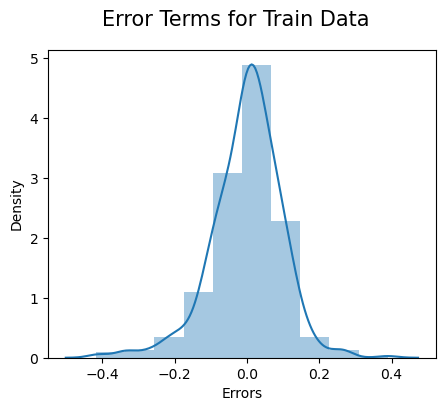

In [62]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(5,4))
sns.distplot((y_train - y_train_predict), bins = 10)
fig.suptitle('Error Terms for Train Data', fontsize = 15)                 
plt.xlabel('Errors', fontsize = 10)                         

The above curve shows that the model residual is normally distributed with mean at 0  ..  It meets one of the assumptions of linear model

Text(0, 0.5, 'y_train_predict')

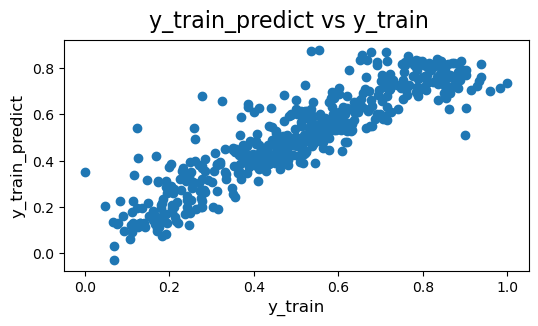

In [63]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure(figsize=(6,3))
plt.scatter(y_train, y_train_predict)
fig.suptitle('y_train_predict vs y_train', fontsize = 16)              
plt.xlabel('y_train', fontsize = 12)                          
plt.ylabel('y_train_predict', fontsize = 12)      

The above plot is showing linear relationship between train data and predicted data. The plot is not of funnel type. This indicates constant variation and there is not heteroscadasticity .. It meets one of the assumptions of the linear model

## Step 6: Making Predictions Using the Final Model


Let's make prediction based on test data and final model


#### Scale test set first

In [64]:
num_vars = ["temp","atemp","hum","windspeed","cnt"]
bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [65]:
# move "cnt" from test data to y_test and rest in X-test
y_test = bike_df_test.pop("cnt")
X_test = bike_df_test
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
184,0,1,0,0.831783,0.769663,0.657365,0.084226,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901380,0.842592,0.610128,0.153725,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511974,0.496141,0.837699,0.334210,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795338,0.437099,0.339569,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817256,0.741468,0.314297,0.537413,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
#Drop const as it is already present
X_train_lr_9_new = X_train_lr_9.drop(["const"],axis=1)

#Create new X_test set 
X_test_rfe = X_test[X_train_lr_9_new.columns]

# Adding a constant variable on new X-test set
X_test_rfe = sm.add_constant(X_test_rfe)


In [67]:
X_test_rfe.head()

,const,yr,temp,windspeed,spring,Light Rain,Mist Weather
184,1.0,0,0.831783,0.084226,0,0,1
535,1.0,1,0.901380,0.153725,0,0,0
299,1.0,0,0.511974,0.334210,0,0,1
221,1.0,0,0.881625,0.339569,0,0,0
152,1.0,0,0.817256,0.537413,0,0,0


In [68]:
#Final prediction
y_test_predict = lr_9.predict(X_test_rfe)

## Step 7: Model Evaluation

In [69]:
#evaluate model using scikit learn r2_score - test data
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_predict)

0.7922039049475746

In [70]:
#evaluate model using scikit learn r2_score - training data
r2_score(y_true=y_train, y_pred=y_train_predict)

0.8121609635554414

R2 in both Training (0.812) and Test (0.792) set is very close (within 5%). So model looks good. 

Let's plot the difference between y_test and y_test_predict to see whether it is normally distributed and matching with the same evaluated based on train data set

Text(0.5, 0, 'Errors')

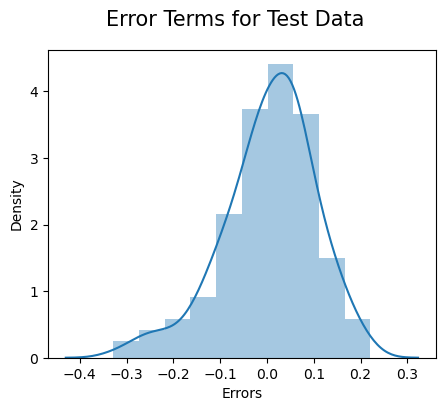

In [71]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(5,4))
sns.distplot((y_test - y_test_predict), bins = 10)
fig.suptitle('Error Terms for Test Data', fontsize = 15)                 
plt.xlabel('Errors', fontsize = 10)                         

The above curve shows that the model residual is normally distributed with mean at 0 and it is similar to what we have plotted based on training data set during resedual analysis (#step 8)  .. It meets one of the assumtions of the linear model

Text(0, 0.5, 'y_test_predict')

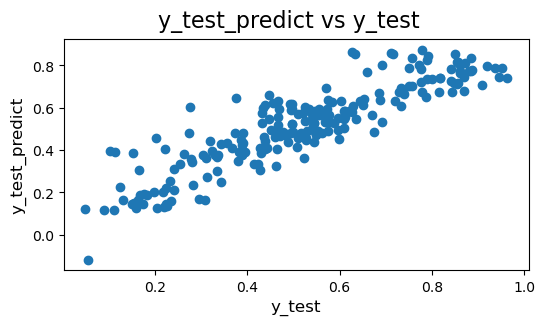

In [72]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure(figsize=(6,3))
plt.scatter(y_test, y_test_predict)
fig.suptitle('y_test_predict vs y_test', fontsize = 16)              
plt.xlabel('y_test', fontsize = 12)                          
plt.ylabel('y_test_predict', fontsize = 12)      

The above plot is showing linear relationship between test data and predicted data. The plot is not of funnel type. This indicates constaint variation and there is not heteroscadasticity... It meets one of the assumtions of the linear model

## Step 8: Summary/Conclusion: 


-  The final linear equation based on the dataset given:

$ cnt = 0.3204 + 0.2364  \times  yr + 0.3627  \times  temp + (- 0.1571 \times windspeed) + (- 0.1538 \times spring) + (- 0.2713 \times Light Rain) + (- 0.0755 \times Mist weather) $ <br>

The above equation is showing that:<br>
-  Increase in temp causes an increase in bike rent when all other predictors are not changing
-  Bike rent inreases with increase in year when all other predictors are not changing 
-  Increase in Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds causes a decrease in bike rent when all other predictors are not changing
-  Increase in windspeed causes a decrease in bike rent when all other predictors not not changing 
-  During spring, there is a decrease in bike rent when all other predictor is not changing 
-  During Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, there is a decrease in bike rent when all other predictor is not changing 
